<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/Multilayer_Percepton_Neural_Network(Q_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
data = pd.read_csv("iris.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Identify features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)  # One-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 2️⃣ Define a Function to Build and Train MLP
# --------------------------
def build_and_train_model(activation='relu', optimizer='adam', loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(5, input_dim=4, activation=activation))  # hidden layer with 5 neurons
    model.add(Dense(3, activation='softmax'))                # output layer for 3 classes

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=300, batch_size=10, verbose=0)

    # Evaluate model
    loss_value, accuracy_value = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n🔹 Activation: {activation}, Optimizer: {optimizer}, Loss: {loss_value:.4f}, Accuracy: {accuracy_value:.4f}")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # --------------------------
    # 📈 Plot Loss and Accuracy Curves
    # --------------------------
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss Curve ({activation}, {optimizer})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'Accuracy Curve ({activation}, {optimizer})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # --------------------------
    # 🔥 Confusion Matrix Heatmap
    # --------------------------
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix ({activation}, {optimizer})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # --------------------------
    # 🧾 Classification Report
    # --------------------------
    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: relu, Optimizer: <keras.src.optimizers.adam.Adam object at 0x79d9a6490b60>, Loss: 0.0195, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


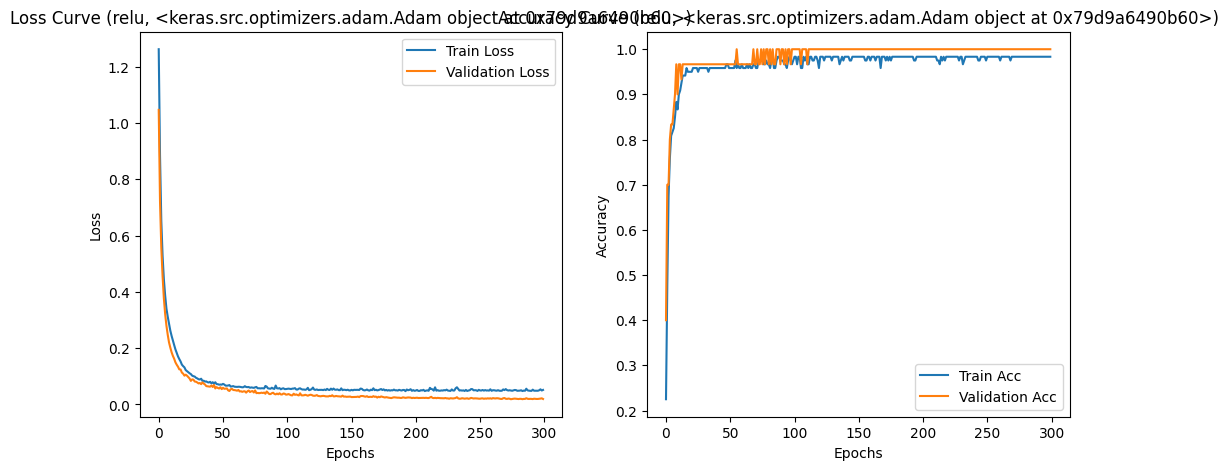

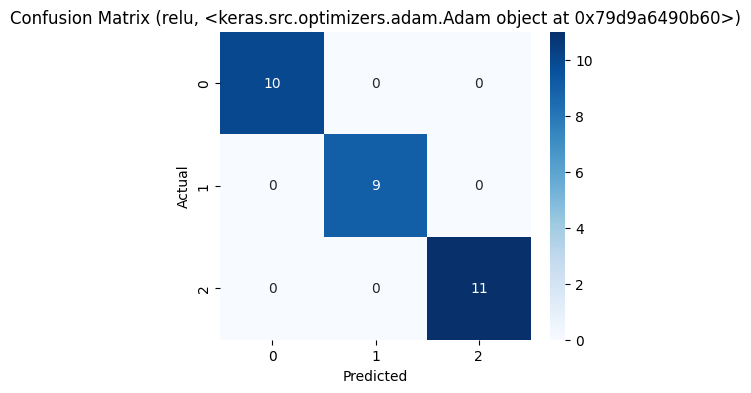


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: sigmoid, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x79d9a4e066c0>, Loss: 0.0415, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


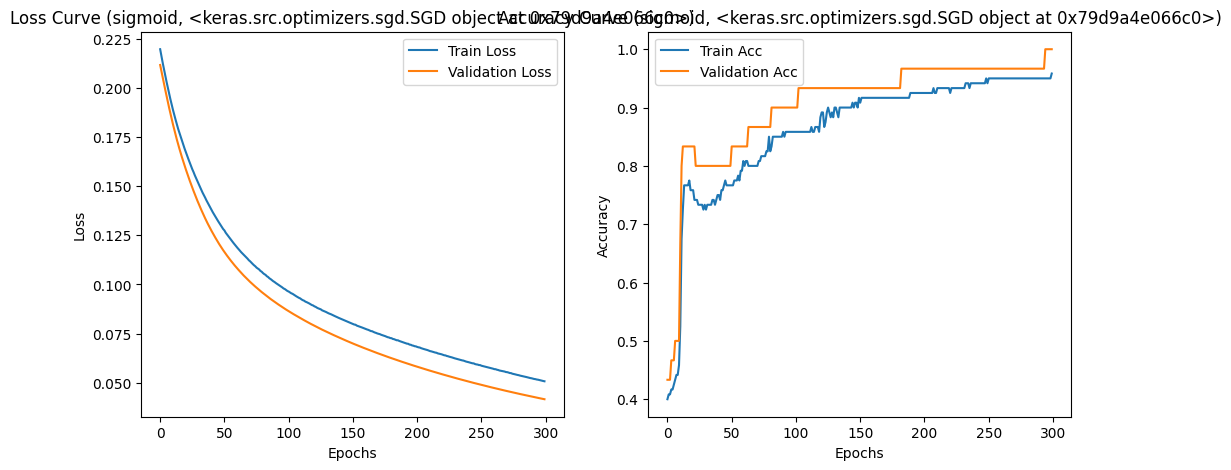

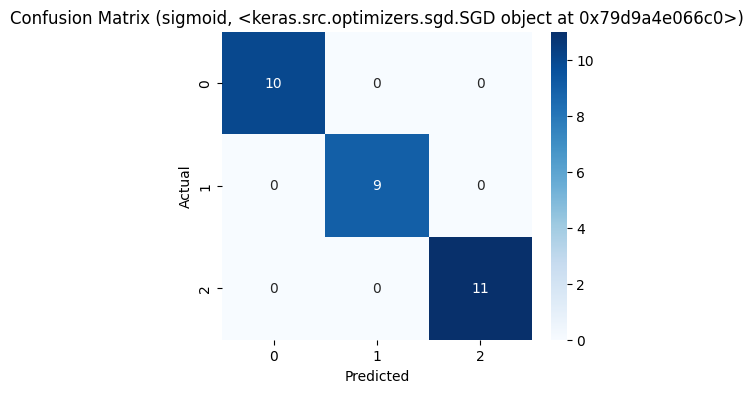


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🔹 Activation: tanh, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x79d9a6241700>, Loss: 0.0786, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


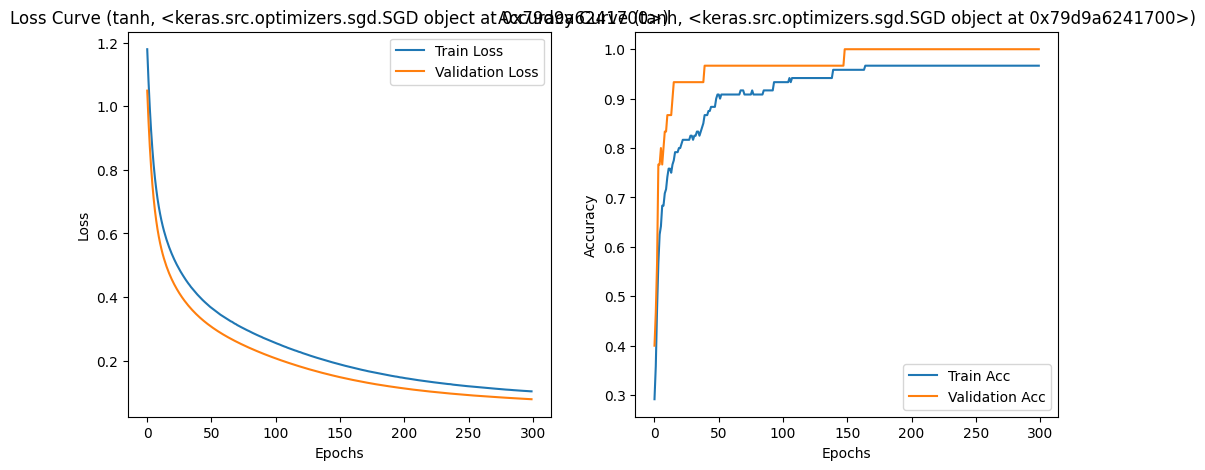

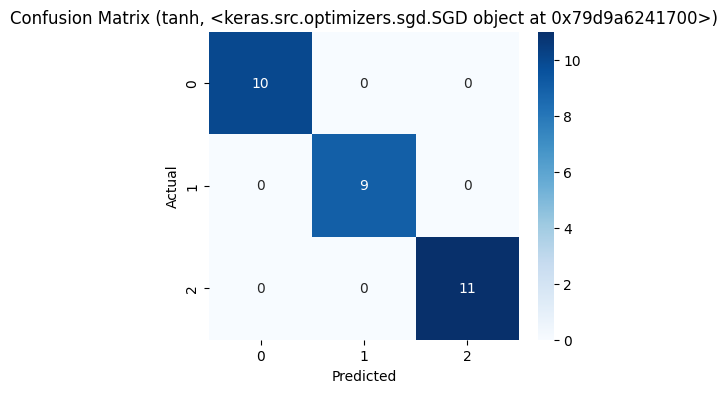


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# 3️⃣ Run Experiments
# --------------------------

# (A) ReLU activation + Adam optimizer + CrossEntropy loss
build_and_train_model(activation='relu', optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy')

# (B) Sigmoid activation + SGD optimizer + MSE loss
build_and_train_model(activation='sigmoid', optimizer=SGD(learning_rate=0.05), loss='mean_squared_error')

# (C) tanh activation + SGD optimizer + CrossEntropy loss
build_and_train_model(activation='tanh', optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy')